In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from scipy.interpolate import make_interp_spline
from matplotlib.lines import Line2D

**INPUT THE EXPERIMENT NAME BELOW**

In [50]:
experiment_name = "data"

/var/folders/5z/crw_cmx12w9_9m589xkz8x6c0000gn/T/ipykernel_36973/2555720438.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))
/var/folders/5z/crw_cmx12w9_9m589xkz8x6c0000gn/T/ipykernel_36973/2555720438.py:65: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))


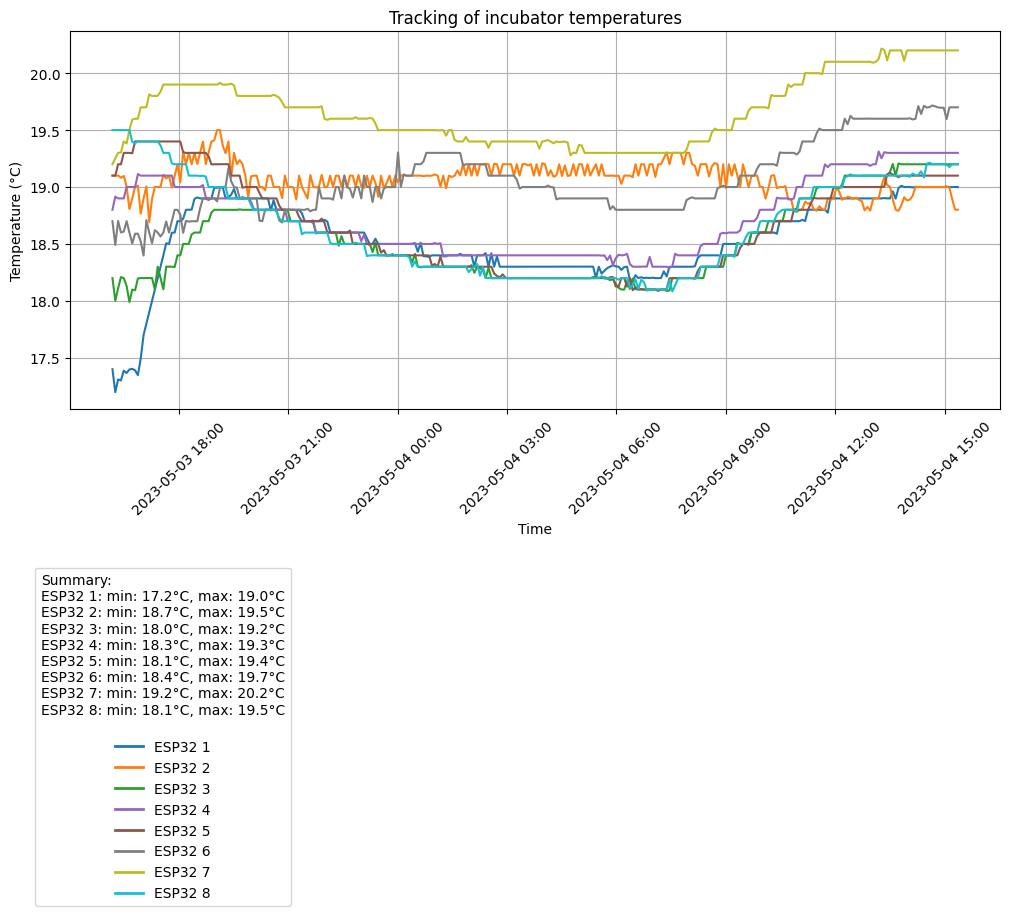

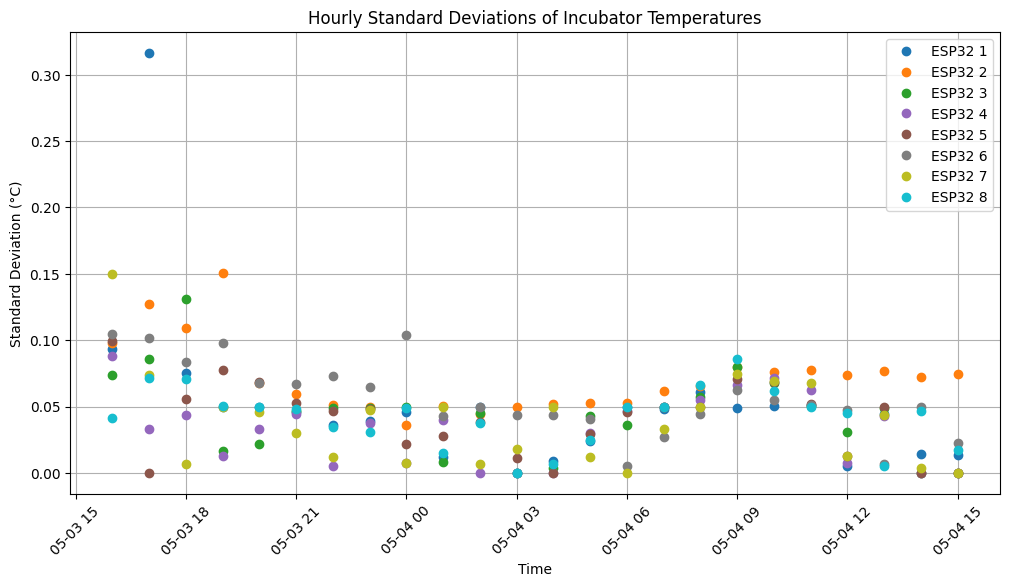

In [52]:

# Read CSV data
data = pd.read_csv(f'/Users/noahbruderer/Documents/Work_Documents/IncubatorWeatherStation/{experiment_name}.csv',
                   delimiter=',')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Get the unique ESP32 numbers and sort them
unique_esp32_numbers = sorted(data['ESP32 Number'].unique())

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each ESP32 number
colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))
for idx, esp32_number in enumerate(unique_esp32_numbers):
    esp32_data = data[data['ESP32 Number'] == esp32_number]

    # Interpolate data for a smooth curve
    x = np.array(esp32_data['Date'].astype('int64'))
    y = np.array(esp32_data['Temperature'])
    x_smooth = np.linspace(x.min(), x.max(), 300)
    spline = make_interp_spline(x, y, k=3)
    y_smooth = spline(x_smooth)
    x_smooth_dates = pd.to_datetime(x_smooth, unit='ns')

    ax.plot(x_smooth_dates, y_smooth, color=colors(idx))

ax.set_xlabel('Time')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Tracking of incubator temperatures')
plt.xticks(rotation=45)
ax.grid()

# Set the date format for the x-axis
date_format = DateFormatter("%Y-%m-%d %H:%M")
ax.xaxis.set_major_formatter(date_format)

# Display the summary
summary = data.groupby('ESP32 Number')['Temperature'].agg(['count', 'min', 'max']).reset_index()

summary_text = "Summary:\n"

# Create custom legend elements
legend_elements = []

for idx, row in summary.iterrows():
    esp32_number = int(row['ESP32 Number'])
    label = f"ESP32 {esp32_number}"
    summary_text += f"{label}: min: {row['min']}°C, max: {row['max']}°C\n"
    legend_elements.append(Line2D([0], [0], color=colors(idx), lw=2, label=label))

# Place the custom legend next to the corresponding label in the summary
ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.1, -0.4), ncol=1, fontsize=10, title=summary_text)

# Adjust the layout
plt.subplots_adjust(bottom=0.25)
# Resample the data to hourly intervals and compute the mean and standard deviation
hourly_data = data.groupby('ESP32 Number').resample('1H', on='Date')['Temperature'].agg(['mean', 'std']).reset_index()

# Set the plot size
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for each ESP32 number
colors = plt.cm.get_cmap('tab10', len(unique_esp32_numbers))
for idx, esp32_number in enumerate(unique_esp32_numbers):
    esp32_data = hourly_data[hourly_data['ESP32 Number'] == esp32_number]
    ax.plot(esp32_data['Date'], esp32_data['std'], 'o', color=colors(idx), label=f"ESP32 {esp32_number}")

ax.set_xlabel('Time')
ax.set_ylabel('Standard Deviation (°C)')
ax.set_title('Hourly Standard Deviations of Incubator Temperatures')
plt.xticks(rotation=45)
ax.grid()
ax.legend()

# Display the plot
plt.show()
